In [1]:
import numpy as np
import matplotlib.pyplot as plt

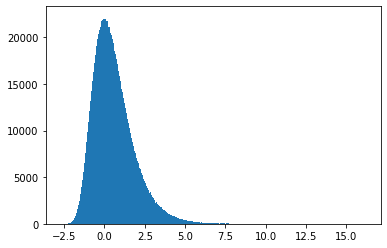

In [2]:
N = 10**7
gumbels = np.zeros(N)
for i in range(N):
  gumbels[i] = -np.log(-np.log(np.random.uniform(0,1)))
plt.hist(gumbels, int(N**0.5))
plt.show()

In [ ]:
'''def geometric(p,cutoff):
  q = 1-p
  while True:
    i = 1
    while True:
      if np.random.uniform(0,1) < p * (q ** (i-1)):
        return i
      i += 1
      if i > cutoff:
        break'''

In [3]:
def geometric(p):
  flips = 1
  while True:
    if np.random.uniform(0,1) < p:
      return flips
    flips += 1

In [4]:
def geometricMax(p,n):
  maxxie = 0
  for i in range(n):
    maxxie = max(maxxie, geometric(p))
  return maxxie

In [24]:
def geoMax(p,n,cutoff):
  q = 1-p
  while True:
    k = 1
    while True:
      if np.random.uniform(0,1) < (1-q**k)**n - (1-q**(k-1))**n:
        return k
      k += 1
      if k > cutoff:
        break

In [47]:
def geoMaxPDF(p,n,k):
  q = 1-p
  return (1-q**k)**n - (1-q**(k-1))**n

In [42]:
geoMax(0.05,10,1000)

39

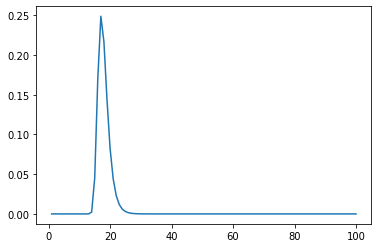

In [104]:
n = 10**5
p = 0.5
N = 100
Kvals = np.linspace(1,N,N)
geometrics = np.zeros(N)
for i in range(N):
  geometrics[i] = geoMaxPDF(p,n,Kvals[i])

plt.plot(Kvals,geometrics)

In [79]:
Ns = np.linspace(10**200, 10**300, 20)
for n in Ns:
  p = 0.5
  k = 54
  print(geoMaxPDF(p,n,k))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


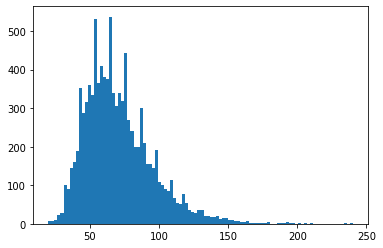

In [108]:
N = 10**4
n = 20
p = 0.05
cutoff = 150
geometrics = np.zeros(N)
for i in range(N):
  if i % 500 == 0:
    print(i)
  geometrics[i] = geometricMax(p,n)

plt.hist(geometrics, int(N**0.5))
plt.show()

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


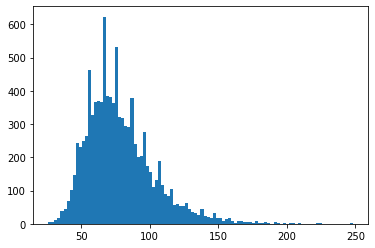

In [44]:
N = 10**4
n = 30
p = 0.05
cutoff = 1000
geometrics = np.zeros(N)
for i in range(N):
  if i % 500 == 0:
    print(i)
  geometrics[i] = geometricMax(p,n)

plt.hist(geometrics, int(N**0.5))
plt.show()

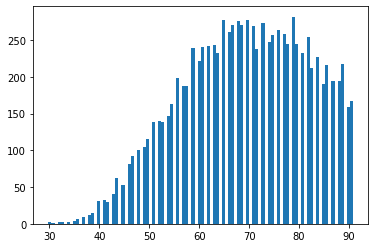

In [ ]:
geometrics -= np.log(n)
plt.hist(geometrics,int(N**0.5))
plt.show()

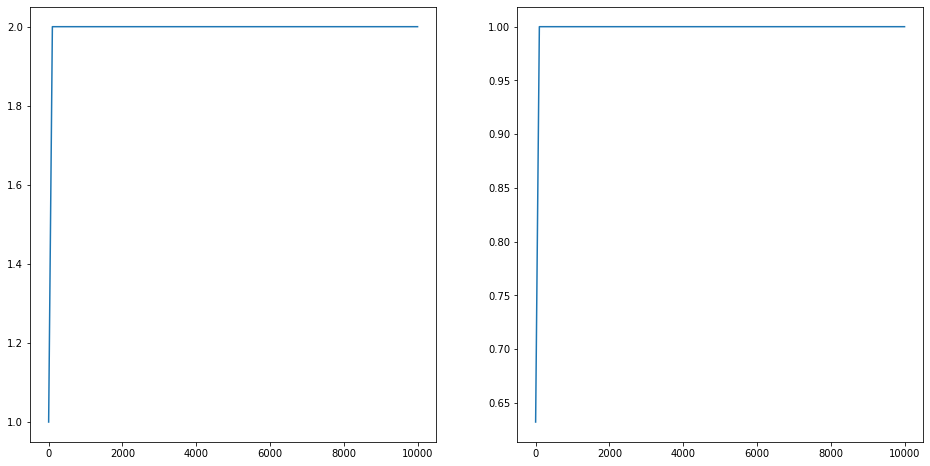

In [7]:
p = 0.5
cutoff = 100000
xvalues = np.linspace(1,10000,100)
geoValues = 1/p * (1-(1-p)**xvalues)
exp = 1 - np.exp(-xvalues)

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.plot(xvalues,geoValues)
plt.subplot(1,2,2)
plt.plot(xvalues,exp)

plt.show()

In [81]:
def peak(q,n):
  x = 0
  while True:
    if (1-q**x)**n - (1-q**(x-1))**n > (1-q**(x+1))**n - (1-q**x)**n:
      return x
    x += 1

In [84]:
peak(0.5,10**60)

54

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650


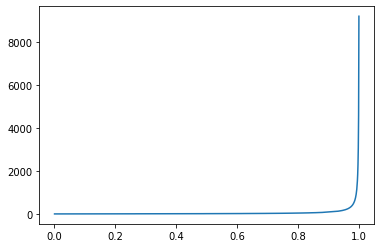

In [ ]:
n = 10**4
Q = np.linspace(0.001,0.999, 1000)
peaks = np.zeros(len(Q))
for i in range(len(Q)):
  print(i)
  peaks[i] = peak(Q[i], n)

plt.plot(Q, peaks)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


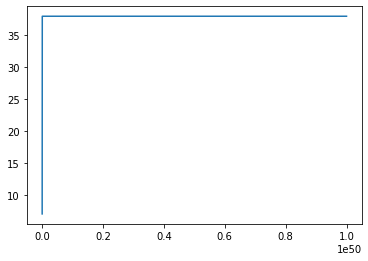

In [91]:
N = np.linspace(10**3,10**50,10**5)
q = np.exp(-1)
peaks = np.zeros(len(N))
for i in range(len(N)):
  peaks[i] = peak(q, N[i])

plt.plot(N, peaks)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


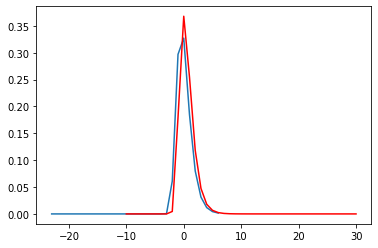

24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
heads = 30
A = 24
C = 1
I1s = np.linspace((-10-A)/C,(heads-A)/C,heads+11)
I2s = np.linspace(-10, heads, heads+11)
N = 10**10
q = np.exp(-1)
geoMaxPDF = np.zeros(heads+11)
for i in range(heads+11):
  geoMaxPDF[i] = (1-q**I2s[i])**N - (1-q**(I2s[i]-1))**N


gumbel = np.zeros(heads+11)
gumbel = np.exp(-(I2s + np.exp(-I2s)))
plt.plot(I1s, geoMaxPDF)
plt.plot(I2s, gumbel, color = "r")
plt.show()
print(peak(q,N))